<a href="https://colab.research.google.com/github/hewansirak/GeoParse-Dataset/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install GEOparse

In [23]:
! pip install langchain_pinecone openai langchain-community

  Using cached langchain_pinecone-0.2.3-py3-none-any.whl.metadata (1.3 kB)
  Using cached langchain_community-0.3.20-py3-none-any.whl.metadata (2.4 kB)
  Using cached pinecone-5.4.2-py3-none-any.whl.metadata (19 kB)
  Using cached aiohttp-3.10.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached langchain_tests-0.3.17-py3-none-any.whl.metadata (3.1 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.8.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached langchain_core-0.3.49-py3-none-any.whl.metadata (5.9 kB)
  Using cached pytest_asyncio-0.26.0-py3-none-any.whl.metadata (4.0 kB)
  U

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import GEOparse

In [4]:
gse= GEOparse.get_GEO(geo="GSE12277", destdir="./data/GEO")


28-Mar-2025 14:50:30 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz to ./data/GEO/GSE12277_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz to ./data/GEO/GSE12277_family.soft.gz
100%|██████████| 19.8M/19.8M [00:03<00:00, 5.65MB/s]
28-Mar-2025 14:50:36 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
28-Mar-2025 14:50:36 DEBUG downloader - Moving /tmp/tmpzb8k5pix to /content/data/GEO/GSE12277_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpzb8k5pix to /content/data/GEO/GSE12277_family.soft.gz
28-Mar-2025 14:50:36 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz
28-Mar-2025 14:50:36 INFO GEOparse - Parsing ./data/GEO/GSE

In [5]:
gsm= gse.gsms["GSM308246"]
data= gsm.table
data.head(-5)

,ID_REF,VALUE,ABS_CALL,DETECTION P-VALUE
0,AFFX-BioB-5_at,115.457000,P,0.000581
1,AFFX-BioB-M_at,119.770000,P,0.000044
2,AFFX-BioB-3_at,84.816300,P,0.000095
3,AFFX-BioC-5_at,296.351000,P,0.000052
4,AFFX-BioC-3_at,470.652000,P,0.000044
...,...,...,...,...
54665,1570631_at,12.766800,P,0.023926
54666,1570632_at,1.179860,A,0.780518
54667,1570633_at,0.159784,A,0.953857
54668,1570635_at,1.926470,A,0.753906


In [6]:
print("Metadata:")
for key, value in gse.metadata.items():
    print(f"{key}: {value}")


Metadata:
title: ['Hematopoietic Progenitor Cells of Different Donor Age']
geo_accession: ['GSE12277']
status: ['Public on Jun 12 2009']
submission_date: ['Jul 29 2008']
last_update_date: ['Mar 25 2019']
pubmed_id: ['19513108']
summary: ['In this series we have analyzed the effect of donor age on the gene expression profile of human hematopoietic stem and progenitor cells (HPC). Cells were taken from umbilical cord blood (CB) or from G-CSF mobilized blood of healthy donors for allogeneic blood stem cell transplantation.']
overall_design: ['Hematopoietic progenitor cells (HPC) were isolated within the CD34+ cell fraction from fresh human cord blood (CB) or from G-CSF mobilized peripheral blood (PB) as described in detail before (Wagner et al., Blood, 2004, 104:675-684; Wagner et al., Stem cells, 2005, 23:1180-1191; Wagner et al., 2007, 10:2638-2657). Differential gene expression was subsequently compared in the CD34+ samples of different donor age.']
type: ['Expression profiling by arra

In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_REF             54675 non-null  object 
 1   VALUE              54675 non-null  float64
 2   ABS_CALL           54675 non-null  float64
 3   DETECTION P-VALUE  54675 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.7+ MB
None


In [50]:
print(data.isnull().sum())

ID_REF               0
VALUE                0
ABS_CALL             0
DETECTION P-VALUE    0
dtype: int64


We don't have any null value here so we don't drop any row/col

In [51]:
print(data.describe())

              VALUE      ABS_CALL  DETECTION P-VALUE
count  54675.000000  54675.000000       5.467500e+04
mean       0.011141      0.421664       2.703439e-01
std        0.049563      0.485910       3.129571e-01
min        0.000000      0.000000       2.606800e-13
25%        0.000485      0.000000       2.929690e-03
50%        0.001632      0.000000       1.115720e-01
75%        0.006293      1.000000       5.000000e-01
max        1.000000      1.000000       9.997560e-01


In [52]:
print(data['ABS_CALL'].value_counts())

ABS_CALL
0.0    30772
1.0    22206
0.5     1697
Name: count, dtype: int64


This shows us that our categorical value called 'ABS_CALL' has three catergories with it's respective count

Text(0.5, 1.0, 'ABS_CALL category count')

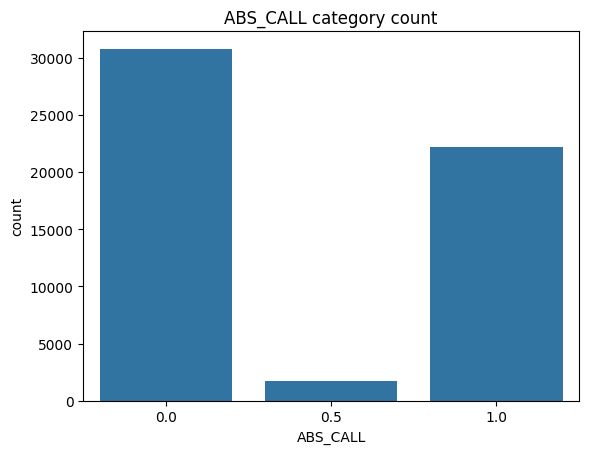

In [54]:
sns.countplot(x="ABS_CALL", data=data)
plt.title("ABS_CALL category count")

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
data['VALUE'] = scaler.fit_transform(data[['VALUE']])

In [62]:
data['ABS_CALL'] = data['ABS_CALL'].map({'P': 1, 'A': 0, 'M': 0.5})

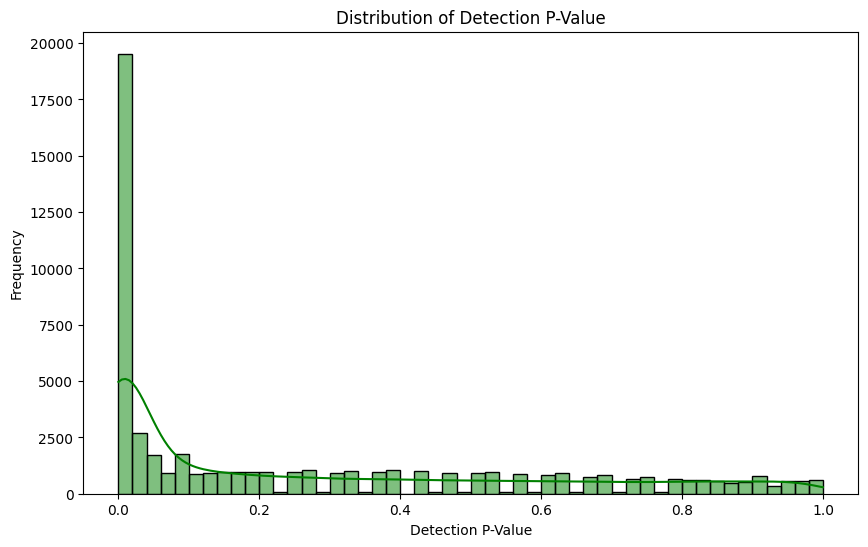

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DETECTION P-VALUE'], bins=50, kde=True, color='green')
plt.title("Distribution of Detection P-Value")
plt.xlabel("Detection P-Value")
plt.ylabel("Frequency")
plt.show()


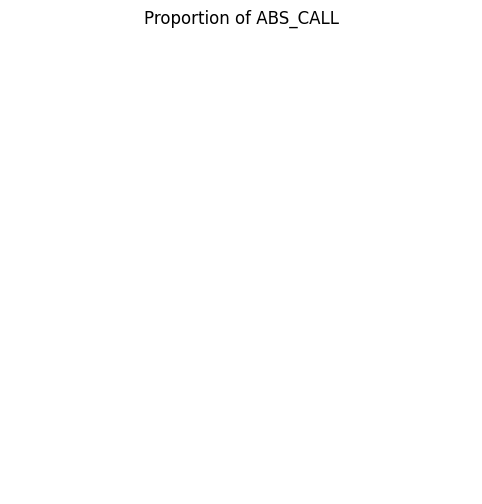

In [65]:
plt.figure(figsize=(8, 6))
data['ABS_CALL'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'gray'])
plt.title("Proportion of ABS_CALL")
plt.ylabel("")
plt.show()


In [66]:
top_probes = data.sort_values('VALUE', ascending=False).head(10)
print(top_probes)


                ID_REF     VALUE  ABS_CALL  DETECTION P-VALUE
846        201257_x_at  1.000000       NaN       2.441410e-04
8251       208695_s_at  0.995061       NaN       2.441410e-04
352        200763_s_at  0.967207       NaN       2.441410e-04
515          200926_at  0.956246       NaN       2.441410e-04
11486      212039_x_at  0.953624       NaN       2.441410e-04
13443      214003_x_at  0.948420       NaN       2.441410e-04
26000      226131_s_at  0.937582       NaN       2.441410e-04
306        200717_x_at  0.937525       NaN       2.441410e-04
61     AFFX-hum_alu_at  0.936829       NaN       2.606800e-13
806        201217_x_at  0.934194       NaN       2.441410e-04


In [67]:
def get_huggingface_embeddings(text, model_name="sentence-transformers/all-mpnet-base-v2"):
    model = SentenceTransformer(model_name)
    return model.encode(text)

In [68]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from langchain_pinecone import PineconeVectorStore
from langchain.embeddings import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
from pinecone import Pinecone
import os
import tempfile
from pathlib import Path
from langchain.schema import Document
from openai import OpenAI
import google.generativeai as genai
import json
from google.colab import userdata

In [69]:
sample_data = data.head(10).to_dict(orient='records')

In [70]:
sample_data_str = json.dumps(sample_data)

**NB** - Get a sample Groq Api key from here - https://console.groq.com/keys or make sure to give it access on the collab keys

In [74]:
client = OpenAI(
  base_url="https://api.groq.com/openai/v1",
  api_key=userdata.get("GROQ_API_KEY")
)

In [75]:
abstract = f"""
Title	HPC-PB_donorAF9-35yrs
Sample type	RNA

Source name	Hematopoietic progenitor cells (HPC), mobilized peripheral blood of healthy donors (PB, 35 years old).
Organism	Homo sapiens
Characteristics	Hematopoietic progenitor cells (HPC) were enriched within the CD34+ cell fraction (selection by magnetic beads and subsequent flow cytometric separation) from G-CSF mobilized blood from healthy donors for allogeneic blood stem cell transplantation.
Donor was 35 years old
Biomaterial provider	University of Heidelberg
Treatment protocol	HPC were collected from fresh umbilical cord blood (CB) or mobilized peripheral blood (PB) after written consent using guidelines approved by the Ethic Committee on the Use of Human Subjects at the University of Heidelberg. Mononuclear cells were isolated after centrifugation on Ficoll-hypaque (Biochrom KG, Berlin, Germany). CD34+ cells were enriched with a monoclonal anti-CD34 antibody labeled using magnetic beads on an affinity column (Miltenyi Biotec, Bergisch-Gladbach, Germany). After additional staining with anti-CD34-APC (Becton Dickinson, San Jose, CA, [BD]) further purification was achieved using the FACS-Vantage-SE flow cytometry system. Staining with propidium iodide (PI) was performed to allow exclusion of non-viable cells. Reanalysis revealed purity higher than 95%.
Growth protocol	Cells were isolated from fresh blood and immediately harvested for subsequent analysis.
Extracted molecule	total RNA
Extraction protocol	Total RNA was isolated using TRIzol reagent (Invitrogen, Paisley, Scotland) according to the manufacturer´s instructions. RNA quality was controlled using the RNA 6000 Pico LabChip kit (Agilent, Waldbronn, Germany) and quantified with a NanoDrop ND-1000 Spectrophotometer (Nanodrop Technologies, Wilmington, DE, USA).
Label	Biotin
Label protocol	100 ng total RNA was amplified with GeneChip two-cycle cDNA synthesis kit (Affymetrix, High Wycombe, United Kingdom) according to the manufacturers instructions. Quality of amplified RNA was controlled by LabChip technology.

Hybridization protocol	GeneChip Human Genome U133_Plus_2.0 (Affymetrix) were hybridized with 10 µg amplified RNA and washed with a fluidics station 450 (Affymetrix).
Scan protocol	GeneChip Human Genome U133_Plus_2.0 (Affymetrix) were scanned with GeneChip scanner 3000 (Affymetrix)
"""
prompt = f""" You are an expert Data Analyst, I have a dataset stored in
```{sample_data_str}```
 that I need to analyze. Please examine the first few rows of this data as well as
 the ```{abstract}```
and do the below step by step:

1. Generate comprehensive descriptions for each column that explain:
   - The data type
   - The likely purpose/meaning of the column
   - Potential values or ranges
   - Any patterns or notable characteristics

2. Format your response as a clean JSON object with ``` where:
   - Each key is the exact column name
   - Each value is a detailed description of that column
   - Include a "data_type" field for each column

3. For example:
{{
  "column_name": {{
    "description": "Detailed explanation of what this column represents",
    "data_type": "The data type (integer, string, date, etc.)",
    "possible_values": "Description of the range or categorical values",
    "notes": "Any additional observations about the data"
  }}
}}
Be definite in your answer!
Provide in JSON format only!!!
First find relevant information from the abstract then answer the question based
on the relevant information.
"""
response = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "system", "content": "You are an expert data analyst."},
        {"role": "user", "content": prompt}
    ]
)
print(response.choices[0].message.content)

```
{
  "ID_REF": {
    "description": "This column represents the reference ID for the microarray probe sets, which are used to identify specific genes or expressed sequence tags (ESTs) in the human genome",
    "data_type": "string",
    "possible_values": "Unique strings in the format 'AFFX-XXX-XX_at', where 'XXX' is a specific code for the probe and 'XX' is a unique identifier",
    "notes": "These IDs are likely used as indices to match the microarray data with the corresponding gene or EST in a reference database"
  },
  "VALUE": {
    "description": "This column represents the normalized intensity values for each microarray probe set, which indicate the level of expression of the corresponding gene or EST",
    "data_type": "float",
    "possible_values": "Values between 0 and 1, or possibly greater than 1, representing the relative abundance of the transcript in the sample",
    "notes": "These values are often used for downstream analysis, such as identifying differentially ex